In [2]:
#Goal of code is for Hot-Stack Imputation



In [3]:
#Calculating Similarity Variable for each observation

# Need to make 44 df's (one dataframe for every observation with missing values) 
#       -has rankings of observations ordered from most similar to least simlar
#       -based off of calculated 'Similarity Metric'

# (only going to impute numerical variables)

# Algorithm:

# 1) First select the observation of interest that has a NaN value and use its values as a reference for the calculation
#    of the 'Similarity Metric.'
# 
# 2) Iterate through every column/variable of orginal data set and calculate a 'Similarity Metric' 
#    based off of the difference in values of the reference observation and for every other observation in the orginal dataset
#    in a new dataframe.
#        a) if the value is missing then skip the calculation for that certain variable 
#        b) metric also enforces a penalty for calculating 'Similarity Metric' with a small amount of variables
#        c) ensures each difference score of each variable is weighted the same

# 3) Aggregate all of the parts of the 'Similarity Metric' Equation that is displayed in the below cell.

# 4) Sort out the observations from lowest to highest (lower score means the observation is more similar than observation
#    that has higher score)

# 5) Pick the most similar observation that has a variable value and impute the 
#    missing values in that observation with the values of the most similar observation
#        a) If the variable that needs to be imputed in the reference observation is missing in the most similar observation
#           then, the next most similar observation value will be imputed.


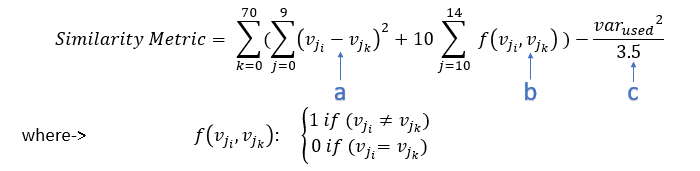

In [1]:
#Importing Package to Display Image
from IPython.display import Image
Image("similarity_metric.png")

In [21]:
#Importing Packages to be used throughout the code

import pandas as pd
import numpy as np


In [22]:
#Reading the csv into a dataframe 
df=pd.read_csv('hbat_miss_dat.csv')

#Renaming the ID to index for sake of continuity
df=df.rename(columns={'id':'index'})

#Changing the data type of the Index for merging purposes later
for index,row in df.iterrows():
    df['index'].iloc[index]=str(row['index'])
    df['index'].iloc[index]=df['index'].str[:3].iloc[index]
df.set_index('index',inplace=True)
df.index

C:\anaconda_path\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Index(['201', '202', '203', '204', '205', '206', '207', '208', '209', '210',
       '211', '212', '213', '214', '215', '216', '217', '218', '219', '220',
       '221', '222', '223', '224', '225', '226', '227', '228', '229', '230',
       '231', '232', '233', '234', '235', '236', '237', '238', '239', '240',
       '241', '242', '243', '244', '245', '246', '247', '248', '249', '250',
       '251', '252', '253', '254', '255', '256', '257', '258', '259', '260',
       '261', '262', '263', '264', '265', '266', '267', '268', '269', '270'],
      dtype='object', name='index')

In [23]:
#Picking out the observations that have no missing values.

a=df.v1.notnull()
a=df[a]

b=df.v2.notnull()
b=df[b]
a=a.append(b)

c=df.v3.notnull()
c=df[c]
a=a.append(c)

d=df.v4.notnull()
d=df[d]
a=a.append(d)

e=df.v5.notnull()
e=df[e]
a=a.append(e)

f=df.v6.notnull()
f=df[f]
a=a.append(f)

g=df.v7.notnull()
g=df[g]
a=a.append(g)

q=df.v8.notnull()
q=df[q]
a=a.append(q)

w=df.v9.notnull()
w=df[w]
a=a.append(w)
filter_n=a.groupby('index').count()


filter_a=filter_n[filter_n.v1==9]
filter_b=filter_n[filter_n.v1<9]
list_i=[]
for index,row in filter_a.iterrows():
    list_i.append(index)


list_j=[]
for index,row in filter_b.iterrows():
    list_j.append(index)
    
list_j 
df1=df.loc[list_i]
df2=df.loc[list_j]


In [24]:
#Displaying first 5 observations without any null values

df1.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
index,,,,,,,,,,,,,,
201,3.3,0.9,8.6,4.0,2.1,1.8,6.3,41.0,4.5,0.0,1.0,0.0,0.0,2.0
206,4.6,2.1,7.9,5.8,3.4,2.8,4.7,49.0,5.9,0.0,1.0,0.0,1.0,3.0
208,5.2,1.3,9.7,6.1,3.2,3.9,6.7,54.0,5.8,0.0,1.0,0.0,1.0,3.0
209,3.5,2.8,9.9,3.5,3.1,1.7,5.4,49.0,5.4,0.0,1.0,0.0,1.0,3.0
211,3.0,2.8,7.8,7.1,3.0,3.8,7.9,49.0,4.4,0.0,1.0,1.0,1.0,2.0


In [25]:
#Displaying observations with at least one null value

df2.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
index,,,,,,,,,,,,,,
202,NaN,0.4,NaN,2.5,1.2,1.7,5.2,35.0,3.3,0.0,1.0,0.0,0.0,1.0
203,3.0,NaN,9.1,7.1,3.5,3.4,NaN,55.0,5.2,0.0,1.0,1.0,0.0,3.0
204,NaN,1.5,NaN,4.8,1.9,2.5,7.2,36.0,NaN,1.0,0.0,1.0,0.0,1.0
205,5.1,1.4,NaN,4.8,3.3,2.6,3.8,49.0,4.9,0.0,1.0,0.0,0.0,2.0
207,NaN,1.5,NaN,4.8,1.9,2.5,7.2,36.0,NaN,1.0,0.0,1.0,0.0,1.0


In [26]:
#Creating empty dataframes to calculate each of the Similarity Metric's contributions

names={}
columns=['V1_Diff','V2_Diff','V3_Diff','V4_Diff','V5_Diff','V6_Diff','V7_Diff','V8_Diff','V9_Diff','V10_Diff',
         'V11_Diff','V12_Diff','V13_Diff','V14_Diff','Similarity Metric']
index_used=list(df.index)
count=0
for value in index_used:
    index_used[count]=str(value)
    count+=1
for name,row in df2.iterrows():

    names.update({('DF'+str(name)):pd.DataFrame(columns=columns,index=index_used)})
    
    


#This shows the number of observations in the reference Dataframe for observation having index 203
len(names['DF203'])


70

In [27]:
#Calculating the Similarity Metric

counter=0
variable_used=0
sum_diff2=0

#doing a loop with the dataframe to calculate the similarity metric

for index,row1 in df2.iterrows():
   
    
#a nested loop comparing each observation in the main Dataframe without comparing the observation to itself

    counter=0
    for index_2,row2 in df.iterrows():
        variable_used=0
       
        sum_diff2=0
     
       
        if index_2 != index:
            
            #checking if one of the variables when making the metric are missing
            
            if ~np.isnan(row1.v1) and ~np.isnan(row2.v1):
                
               
                names['DF'+str(index)].loc[str(index_2)].V1_Diff=(row2.v1-row1.v1)**2
               
                variable_used+=1
               
               
            if ~np.isnan(row1.v2) and ~np.isnan(row2.v2):
               
                names['DF'+str(index)].loc[str(index_2)].V2_Diff=(row2.v2-row1.v2)**2
                variable_used+=1
              
               
                
            if ~np.isnan(row1.v3) and ~np.isnan(row2.v3):
               
                names['DF'+str(index)].loc[str(index_2)].V3_Diff=(row2.v3-row1.v3)**2
                variable_used+=1
             
                
            if ~np.isnan(row1.v4) and ~np.isnan(row2.v4):
               
                names['DF'+str(index)].loc[str(index_2)].V4_Diff=(row2.v4-row1.v4)**2
                variable_used+=1
               
                
            if ~np.isnan(row1.v5) and ~np.isnan(row2.v5):
                names['DF'+str(index)].loc[str(index_2)].V5_Diff=(row2.v5-row1.v5)**2
                variable_used+=1
               
                
            if ~np.isnan(row1.v6) and ~np.isnan(row2.v6):
                names['DF'+str(index)].loc[str(index_2)].V6_Diff=(row2.v6-row1.v6)**2
                variable_used+=1
               
                
            if ~np.isnan(row1.v7) and ~np.isnan(row2.v7):
                names['DF'+str(index)].loc[str(index_2)].V7_Diff=(row2.v7-row1.v7)**2
                variable_used+=1
              
                
            if ~np.isnan(row1.v8) and ~np.isnan(row2.v8):
                names['DF'+str(index)].loc[str(index_2)].V8_Diff=(row2.v8-row1.v8)**2
                variable_used+=1
              
                
            if ~np.isnan(row1.v9) and ~np.isnan(row2.v9):
                names['DF'+str(index)].loc[str(index_2)].V9_Diff=(row2.v9-row1.v9)**2
                variable_used+=1
               
            if ~np.isnan(row1.v10) and ~np.isnan(row2.v10):
                names['DF'+str(index)].loc[str(index_2)].V10_Diff=10*(row2.v10-row1.v10)**2
                variable_used+=1
               
            if ~np.isnan(row1.v11) and ~np.isnan(row2.v11):
                names['DF'+str(index)].loc[str(index_2)].V11_Diff=10*(row2.v11-row1.v11)**2
                variable_used+=1
                
             
            if ~np.isnan(row1.v12) and ~np.isnan(row2.v12):
                names['DF'+str(index)].loc[str(index_2)].V12_Diff=10*(row2.v12-row1.v12)**2
                variable_used+=1
              
                
            if ~np.isnan(row1.v13) and ~np.isnan(row2.v13):
                names['DF'+str(index)].loc[str(index_2)].V13_Diff=10*(row2.v13-row1.v13)**2
             
                variable_used+=1
              
            if ~np.isnan(row1.v14) and ~np.isnan(row2.v14):
                if row1.v14==row2.v14:
                    names['DF'+str(index)].loc[str(index_2)].V14_Diff=0
                else:
                    names['DF'+str(index)].loc[str(index_2)].V14_Diff=10

                variable_used+=1
               
           
            names['DF'+str(index)].loc[str(index_2)]['Similarity Metric']=0
            sum_diff2=names['DF'+str(index)].loc[str(index_2)].sum(axis=0)
           
            
            names['DF'+str(index)].loc[str(index_2)]['Similarity Metric']=sum_diff2-(variable_used**2)/3.5
            
            counter+=1
            names['DF'+str(index)].loc[str(index_2)]['Diff_sum']=sum_diff2
             
 
names['DF203'].head()           
    

,V1_Diff,V2_Diff,V3_Diff,V4_Diff,V5_Diff,V6_Diff,V7_Diff,V8_Diff,V9_Diff,V10_Diff,V11_Diff,V12_Diff,V13_Diff,V14_Diff,Similarity Metric
201,0.09,NaN,0.25,9.61,1.96,2.56,NaN,196,0.49,0,0,10,0,10,189.817
202,NaN,NaN,NaN,21.16,5.29,2.89,NaN,400,3.61,0,0,10,0,10,424.379
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,NaN,NaN,NaN,5.29,2.56,0.81,NaN,361,NaN,10,10,0,0,10,376.517
205,4.41,NaN,NaN,5.29,0.04,0.64,NaN,36,0.09,0,0,10,0,10,31.8986


In [28]:
#Need to convert output dictionary of Dataframes with calculated difference metrics to a dictionary of Dataframes for 
#each reference observation with only the Index and Rank

#Index used to be able to merge Rank Dataframe with values of that observation

index=np.arange(0,70,1)
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69])

In [29]:
#Sorting the Similarity Metric from Lowest to Highest in order to properly place the Ranks

for key,value in names.items():
 
    

    names[key]=names[key].sort_values('Similarity Metric') #works
    names[key].reset_index(inplace=True)

        
names['DF203'].head()

,index,V1_Diff,V2_Diff,V3_Diff,V4_Diff,V5_Diff,V6_Diff,V7_Diff,V8_Diff,V9_Diff,V10_Diff,V11_Diff,V12_Diff,V13_Diff,V14_Diff,Similarity Metric
0,252,0.04,NaN,0.04,0.04,0.04,0.04,NaN,4,0.04,0,0,0,0,0,-36.9029
1,230,2.89,NaN,0.64,0.16,0.25,0.64,NaN,0,0.64,0,0,10,0,0,-25.9229
2,270,2.25,NaN,0.16,6.25,0.16,1.69,NaN,1,0.01,0,0,10,0,0,-19.6229
3,225,2.89,NaN,NaN,NaN,0.25,0.64,NaN,1,0.49,0,0,10,0,0,-13.3014
4,208,4.84,NaN,0.36,1,0.09,0.25,NaN,1,0.36,0,0,10,10,0,-13.2429


In [30]:
#After sorting, no other information from the calculation of the Similarity Metric is needed, other than the index in
#its sorted order.

#This code achieves this:

for key,value in names.items():
    names[key]=names[key]['index']
    names[key]=pd.DataFrame(names[key])
names['DF203'].head()

,index
0,252
1,230
2,270
3,225
4,208


In [31]:
#Creating Pre-Rank Dataframe to merge with the dictionary of Dataframes

index_df=np.arange(1,71,1)
index_df=pd.DataFrame(index_df)
index_df.head()

,0
0,1
1,2
2,3
3,4
4,5


In [32]:
#Merging the Pre-Rank Dataframe with each Dataframe in the dictionary of Dataframes to get the ranks

for key,value in names.items():
    names[key]=pd.merge(names[key],index_df,left_index=True,right_index=True)
    names[key].sort_values('index',inplace=True)
names['DF203'].head()

,index,0
49,201,50
60,202,61
69,203,70
59,204,60
29,205,30


In [33]:
#Resetting the Index to 'index'

for key,value in names.items():
    names[key]=names[key].rename(columns={0:'Rank'})

    names[key].set_index('index',inplace=True)

names['DF203'].head()

,Rank
index,
201,50
202,61
203,70
204,60
205,30


In [34]:
#Merging Dataframe Dictionary with the original dataframe to see its orginal values

for key,value in names.items():

    names[key]=pd.merge(names[key],df,how='inner',left_index=True,right_index=True)
    names[key].sort_values('Rank',inplace=True)
names['DF203'].head()

,Rank,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
index,,,,,,,,,,,,,,,
252,1,2.8,3.8,8.9,6.9,3.3,3.2,8.2,53.0,5.0,0.0,1.0,1.0,0.0,3.0
230,2,4.7,1.3,9.9,6.7,3.0,2.6,6.8,55.0,6.0,0.0,1.0,0.0,0.0,3.0
270,3,4.5,1.6,8.7,4.6,3.1,2.1,6.8,56.0,5.1,0.0,1.0,0.0,0.0,3.0
225,4,4.7,1.3,NaN,NaN,3.0,2.6,6.8,54.0,5.9,0.0,1.0,0.0,0.0,3.0
208,5,5.2,1.3,9.7,6.1,3.2,3.9,6.7,54.0,5.8,0.0,1.0,0.0,1.0,3.0


In [35]:

#Creating Dictionary telling which observations to impute for every variable in the reference observation


impute={}

for index,row in df2.iterrows():  #iterating over the dataframe that has values that need to be imputed
   
    for key,value in names.items(): 
            if str(key[2:])==str(index):
                impute[key]={'v1':{},'v2':{},'v3':{},'v4':{},'v5':{},'v6':{},'v7':{},'v8':{},'v9':{}}
            
                for index2,row2 in value.iterrows():

                       
                        if not bool(impute[key]['v1']): #returns true if dictionary within dictionary is empty
                            if np.isnan(row.v1) and ~np.isnan(row2.v1): #finding observation to impute for v1
                                impute[key]['v1']=index2

                        if not bool(impute[key]['v2']): 
                            if np.isnan(row.v2) and ~np.isnan(row2.v2): 
                                impute[key]['v2']=index2

                        if not bool(impute[key]['v3']): 
                            if np.isnan(row.v3) and ~np.isnan(row2.v3): 
                                impute[key]['v3']=index2

                        if not bool(impute[key]['v4']): 
                            if np.isnan(row.v4) and ~np.isnan(row2.v4): 
                                impute[key]['v4']=index2

                        if not bool(impute[key]['v5']): 
                            if np.isnan(row.v5) and ~np.isnan(row2.v5): 
                                impute[key]['v5']=index2

                        if not bool(impute[key]['v6']): 
                            if np.isnan(row.v6) and ~np.isnan(row2.v6): 
                                impute[key]['v6']=index2


                        if not bool(impute[key]['v7']): 
                            if np.isnan(row.v7) and ~np.isnan(row2.v7): 
                                impute[key]['v7']=index2

                        if not bool(impute[key]['v8']): 
                            if np.isnan(row.v8) and ~np.isnan(row2.v8): 
                                impute[key]['v8']=index2

                        if not bool(impute[key]['v9']): 
                            if np.isnan(row.v9) and ~np.isnan(row2.v9): 
                                impute[key]['v9']=index2
                         
    
                
impute['DF203'] 

#This shows that you need to impute the variable v2 value of the observation having the index of 252 into the 
#observation null v2 variable value having index of 203

{'v1': {},
 'v2': '252',
 'v3': {},
 'v4': {},
 'v5': {},
 'v6': {},
 'v7': '252',
 'v8': {},
 'v9': {}}